In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
airportsDf = pd.read_csv('Airports.csv')
airportsDf

,ID,Airport
0,1,Wiley Post-Will Rogers Mem
1,2,Deadhorse
2,3,Ralph Wien Memorial
3,4,Fairbanks Intl
4,5,Nome
...,...,...
327,328,Rota Intl
328,329,Guam Intll
329,330,Babelthuap/Koror
330,331,Pago Pago Intl


In [ ]:
routesDf = pd.read_csv('Routes.csv')
routesDf

,Source,Source Airport,Destination,Destination Airport,Weight
0,118,Chicago O'hare Intl,201,San Francisco Intl,0.1804
1,118,Chicago O'hare Intl,258,Phoenix Sky Harbor Intl,0.1474
2,118,Chicago O'hare Intl,182,Lambert-St Louis Intl,0.0332
3,118,Chicago O'hare Intl,152,Pittsburgh Intll,0.0416
4,118,Chicago O'hare Intl,162,Philadelphia Intl,0.0676
...,...,...,...,...,...
2121,11,Akiak,13,Bethel,0.0033
2122,10,Akiachak,11,Akiak,0.0011
2123,9,Tuluksak,11,Akiak,0.0022
2124,315,Kapalua,316,Kahului,0.0013


In [ ]:
G1 = nx.Graph()
G1.add_nodes_from(list(airportsDf['Airport']))

for row in routesDf.iterrows():
    rowData = list(row)[1]
    source = rowData['Source Airport']
    target = rowData['Destination Airport']
    strength = rowData['Weight']
    
    G1.add_edge(source, target, weight = strength)

print("No. of Nodes", len(G1.nodes))
print("No. of Edges", len(G1.edges))

No. of Nodes 332
No. of Edges 2126


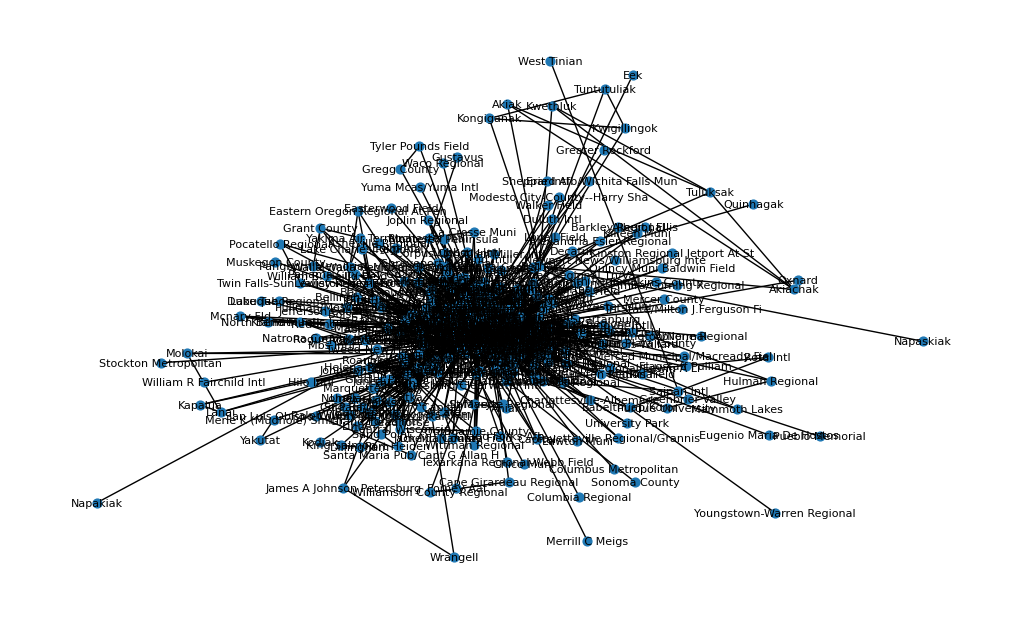

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100) 
nx.draw(G1, with_labels = True, node_size = 40, font_size = 8)

In [ ]:
import networkx.algorithms.community as nx_comm

communities = nx_comm.louvain_communities(G1, seed = 123)
print("Number of communities:", len(communities))

print(communities)

Number of communities: 6
[{'North Bend Muni', 'Tri-Cities', 'Adak Naf', 'San Diego Intl-Lindbergh Fld', 'Grand Forks Afb', 'Spokane Intl', 'Kodiak', 'Kwigillingok', 'Yakima Air Terminal', 'Billings Logan Intl', 'King Salmon', 'Eareckson As', 'Kongiganak', 'Bert Mooney', 'Glacier Park Intl', 'John Wayne Airport-Orange Coun', 'Duluth Intl', 'Kwethluk', 'Wiley Post-Will Rogers Mem', 'Akiak', 'Bethel', 'Minneapolis-St Paul Intl/Wold-', 'Cold Bay', 'Grand Forks Intl', 'Missoula Intll', 'Detroit Metropolitan Wayne Cou', 'Unalaska', 'Nome', 'Portland Intl', 'Grant County', 'Akiachak', 'Gallatin Field', 'Ralph Wien Memorial', 'Sand Point', 'St Paul Island', "St Mary's", 'Eastern Oregon Regional At Pen', 'Burbank-Glendale-Pasadena', 'Tuntutuliak', 'Anchorage Intl', 'Pangborn Memorial', 'Dillingham', 'Napakiak', 'Aniak', 'Napaskiak', 'Deadhorse', 'Kalamazoo/Battle Creek Interna', 'Great Falls Intl', 'Pullman/Moscow Regional', 'Port Heiden', 'Eek', 'Walla Walla Regional', 'Tuluksak', 'Lewiston-Ne

In [ ]:
n = len(communities)
denMat = []

for i in range(1, n + 1):
    denMat.append([0 for i in range(1, n + 1)])

for i in range(0, n):
    for j in range(0, n):
        edgeCnt = 0

        if (i < j):
            for node1 in communities[i]:
                for node2 in communities[j]: 
                    if G1.has_edge(node1, node2): 
                        edgeCnt = edgeCnt + 1

            density = edgeCnt / (len(communities[i]) * len(communities[j]))
            denMat[i][j] = density

print(denMat)

[[0, 0.013868065967016492, 0.02079107505070994, 0.021463757916959886, 0.010950605778191985, 0.022833178005591797], [0, 0, 0.03964194373401535, 0.03460514640638864, 0.02027027027027027, 0.017038777908343124], [0, 0, 0, 0.04201680672268908, 0.030604133545310015, 0.02821939586645469], [0, 0, 0, 0, 0.024544953116381687, 0.01709873138444567], [0, 0, 0, 0, 0, 0.013513513513513514], [0, 0, 0, 0, 0, 0]]


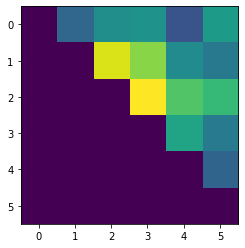

In [ ]:
plt.imshow(denMat)
plt.show()